<a href="https://colab.research.google.com/github/MubarizKhan/MNAD-AutoEncoders/blob/main/MNAD_AE_DataConstruction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
f = '/content/drive/MyDrive/MNAD-FYP/MachineLearningCVE/Dataset-Analysis/all_data.csv'
# f = '/content/drive/MyDrive/MNAD-FYP/MachineLearningCVE/Dataset-Analysis/pure_udata.h5'
# df = pd.read_hdf('/content/drive/MyDrive/MNAD-FYP/MachineLearningCVE/Dataset-Analysis/800k-Dos-DDos-PS-Benign.h5')
df = pd.read_csv(f)

In [ ]:
df.head(10)

,Unnamed: 0,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,54865,3,2,0,12,0,6,6,6.0,0.00000,0,0,0.0,0.0,4.000000e+06,666666.666700,3.0,0.0,3,3,3,3.0,0.0,3,3,0,0.0,0.0,0,0,0,0,0,0,40,0,666666.666700,0.000000,6,6,6.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,33,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,1,55054,109,1,1,6,6,6,6,6.0,0.00000,6,6,6.0,0.0,1.100917e+05,18348.623850,109.0,0.0,109,109,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,9174.311927,9174.311927,6,6,6.000000,0.000000,0.000000,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,29,256,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,2,55055,52,1,1,6,6,6,6,6.0,0.00000,6,6,6.0,0.0,2.307692e+05,38461.538460,52.0,0.0,52,52,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,19230.769230,19230.769230,6,6,6.000000,0.000000,0.000000,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,29,256,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,3,46236,34,1,1,6,6,6,6,6.0,0.00000,6,6,6.0,0.0,3.529412e+05,58823.529410,34.0,0.0,34,34,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,29411.764710,29411.764710,6,6,6.000000,0.000000,0.000000,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,31,329,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,4,54863,3,2,0,12,0,6,6,6.0,0.00000,0,0,0.0,0.0,4.000000e+06,666666.666700,3.0,0.0,3,3,3,3.0,0.0,3,3,0,0.0,0.0,0,0,0,0,0,0,40,0,666666.666700,0.000000,6,6,6.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,32,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
5,5,54871,1022,2,0,12,0,6,6,6.0,0.00000,0,0,0.0,0.0,1.174168e+04,1956.947162,1022.0,0.0,1022,1022,1022,1022.0,0.0,1022,1022,0,0.0,0.0,0,0,0,0,0,0,40,0,1956.947162,0.000000,6,6,6.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,32,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
6,6,54925,4,2,0,12,0,6,6,6.0,0.00000,0,0,0.0,0.0,3.000000e+06,500000.000000,4.0,0.0,4,4,4,4.0,0.0,4,4,0,0.0,0.0,0,0,0,0,0,0,40,0,500000.000000,0.000000,6,6,6.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,32,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
7,7,54925,42,1,1,6,6,6,6,6.0,0.00000,6,6,6.0,0.0,2.857143e+05,47619.047620,42.0,0.0,42,42,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,23809.523810,23809.523810,6,6,6.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,32,256,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
8,8,9282,4,2,0,12,0,6,6,6.0,0.00000,0,0,0.0,0.0,3.000000e+06,500000.000000,4.0,0.0,4,4,4,4.0,0.0,4,4,0,0.0,0.0,0,0,0,0,0,0,40,0,500000.000000,0.000000,6,6,6.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,32,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
9,9,55153,4,2,0,37,0,31,6,18.5,17.67767,0,0,0.0,0.0,9.250000e+06,500000.000000,4.0,0.0,4,4,4,4.0,0.0,4,4,0,0.0,0.0,0,0,1,0

In [ ]:
df.info()

In [ ]:
df[' Label'].value_counts()

BENIGN                        2273097
DoS Hulk                       231073
PortScan                       158930
DDoS                           128027
DoS GoldenEye                   10293
FTP-Patator                      7938
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1966
Web Attack � Brute Force         1507
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name:  Label, dtype: int64

In [ ]:
del df['Unnamed: 0']

In [ ]:
import numpy as np
df.replace([np.inf, -np.inf], np.nan, inplace=True)
# Dropping all the rows with nan values
df.dropna(inplace=True)

from sklearn.preprocessing import LabelEncoder

target = df[' Label']
# le = LabelEncoder()
# target = le.fit_transform(target)

# X = X.apply(lambda col: (col.astype('float16')))
X=df.iloc[:,:-1]
X.info()
X.head(15)

In [ ]:
# // Applying PCA to reduce dimensions and plotting via kmeans
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
 
#Load Data
# data = load_digits().data
pca = PCA(7)
 
#Transform the data
v = pca.fit_transform(df)
v.shape

(800000, 7)

In [ ]:
from sklearn.cluster import KMeans
 
#Initialize the class object
kmeans = KMeans(n_clusters= 4)
 
#predict the labels of clusters.
label = kmeans.fit_predict(v)

print(label)

[0 0 0 ... 0 0 0]


/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


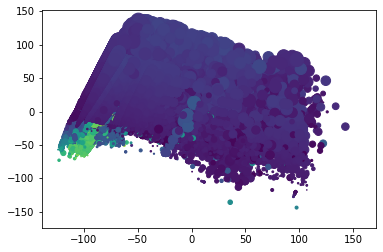

In [ ]:
import matplotlib.pyplot as plt
 
#filter rows of original data
filtered_label0 = v[label == 0]
 
#plotting the results
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1], filtered_label0[:,2], filtered_label0[:,3])
                        
          
          #  , filtered_label0[:,7], filtered_label0[:,8],
            # filtered_label0[:,9])

plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


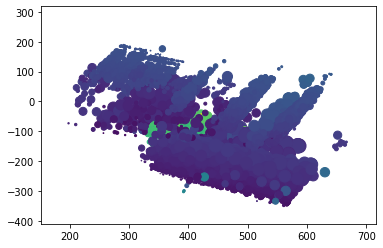

In [ ]:
#filter rows of original data

 
filtered_label8 = v[label == 1]
 
#Plotting the results
# filtered_label2 = v[label == 3]
# plt.scatter(filtered_label2[:,0] , filtered_label2[:,1] , color = 'red')
plt.scatter(filtered_label8[:,0] , filtered_label8[:,1], filtered_label8[:,2],  filtered_label8[:,3] )
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


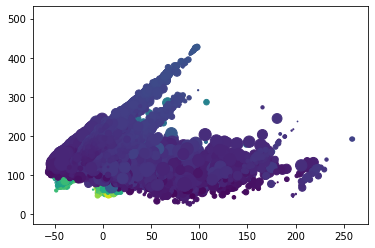

In [ ]:
#Plotting the results
filtered_label2 = v[label == 2]
plt.scatter(filtered_label2[:,0] , filtered_label2[:,1], filtered_label2[:,2], filtered_label2[:,3])

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


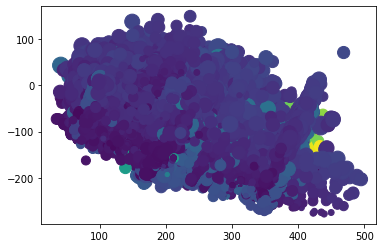

In [ ]:
#Plotting the results
filtered_label2 = v[label == 3]
plt.scatter(filtered_label2[:,0] , filtered_label2[:,1], filtered_label2[:,2], filtered_label2[:,3] )

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, target, test_size = 0.20, random_state = 42)
print(x_train.shape,x_test.shape,len(y_train),len(y_test))

(2230618, 55) (557655, 55) 2230618 557655


In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(random_state=0)
clf.fit(x_train, y_train)


DecisionTreeClassifier(random_state=0)

In [ ]:
clf.feature_importances_

array([7.36481465e-02, 1.58523999e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.17444360e-01, 3.42967922e-07, 0.00000000e+00,
       1.24614042e-04, 2.26647234e-05, 3.77236323e-06, 1.11533455e-09,
       3.07662717e-01, 1.94951139e-07, 5.16376861e-03, 1.94529815e-04,
       3.11356042e-04, 1.34082103e-04, 1.20315486e-05, 1.84667658e-04,
       3.48358566e-04, 4.50788263e-02, 1.35348473e-01, 1.32074356e-04,
       2.92401261e-04, 6.66373376e-05, 1.28161405e-05, 0.00000000e+00,
       0.00000000e+00, 2.73281931e-02, 3.86718626e-02, 7.61716614e-05,
       3.37539386e-05, 5.30908960e-05, 2.21966592e-05, 6.29357546e-03,
       9.89134992e-02, 8.43245609e-04, 2.94258919e-03, 8.14012076e-05,
       1.26399758e-01, 1.18301675e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.66608659e-03,
       1.99062733e-03, 0.00000000e+00, 2.75401965e-03, 1.95034550e-04,
       5.57975150e-06, 7.25451067e-04, 1.13485140e-04])

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()

In [ ]:
feature_names = []
for i in X.columns:
  feature_names.append(i)
feature_names

In [ ]:
feature_names

In [ ]:
df[' Label'].value_counts()
# np.array(['BENIGN','DoS' 'Hulk','PortScan','DDoS'])
target_names = np.array(['BENIGN','DoS Hulk','PortScan','DDoS'])
print((type(target_names[0])))


<class 'numpy.str_'>


In [ ]:
type(iris.feature_names[0])
print(type(iris.target_names[0]))

<class 'numpy.str_'>


In [ ]:
# information about plot_tree arguments are in the docs.
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(300,300))
l = tree.plot_tree(clf, 
                   feature_names=feature_names,  
                   class_names=target_names,
                    filled=True)


In [ ]:
import graphviz
# DOT data
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=feature_names,  
                   class_names=target_names,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph


In [ ]:
tree.plot_tree(clf)

In [ ]:
df[' Label'].value_counts()

BENIGN      2271320
DoS Hulk     230124
PortScan     158804
DDoS         128025
Name:  Label, dtype: int64

In [ ]:
#  get names of indexes for which column Age has value >= 21
# and <= 23
remove_attacks = ['FTP-Patator','SSH-Patator','DoS slowloris','DoS Slowhttptest','Bot',
 'Web Attack � Brute Force','Web Attack � XSS','Infiltration',
 'Web Attack � Sql Injection','Hearztbleed','DoS GoldenEye'] 

for i in remove_attacks:  
  # index_names = 
  index_names = df[ (df[' Label'] == str(i))].index

  # drop these given row
  # indexes from dataFrame
  df.drop(index_names, inplace = True)

In [ ]:
df[' Label'].value_counts()

BENIGN      2271320
DoS Hulk     230124
PortScan     158804
DDoS         128025
Name:  Label, dtype: int64

In [ ]:
filename = '/content/drive/MyDrive/MNAD-FYP/MachineLearningCVE/Dataset-Analysis/U_selectedAttacks.h5'
df.to_hdf(filename, 'data', mode='w', format='table')


In [ ]:
df[' Label'].value_counts()

0    500000
3    100000
2    100000
1    100000
Name:  Label, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

target = df[' Label']
le = LabelEncoder()
target = le.fit_transform(target)

X=df.iloc[:,:-1]
X.info()
X.head(15)

In [ ]:
df[' Label'] = le.fit_transform(df[' Label'])


In [ ]:
# 8 lakh benign 
# 1 lakh Dos Hulk 
# 1 lakh PortScan 
# 1 lakh DDos

X.shape, target.shape

((2788273, 56), (2788273,))

In [ ]:
df[' Label'].value_counts()

0    2271320
2     230124
3     158804
1     128025
Name:  Label, dtype: int64

In [ ]:
# new_df = (df[' Label'] == 'DDos')
df.columns

In [ ]:
benign_df = df.loc[df[' Label'] == 0]
benign_df.shape

(2271320, 57)

In [ ]:
DDos_df = df.loc[df[' Label'] == 1]
DDos_df.shape

(128025, 57)

In [ ]:
dos_hulk_df = df.loc[df[' Label'] == 2]
dos_hulk_df.shape

(230124, 57)

In [ ]:
portscan_df = df.loc[df[' Label'] == 3]
portscan_df.shape

(158804, 57)

In [ ]:
# new_bdf = benign_df

# frames = [df1, df2, df3]

# result = pd.concat(frames)

In [ ]:
frames = [benign_df.head(500000),DDos_df.head(100000),dos_hulk_df.head(100000),portscan_df.head(100000)]
result = pd.concat(frames)

In [ ]:
result.shape

(800000, 57)

In [ ]:
result.head(20)
result[' Label'].value_counts()

0    500000
3    100000
2    100000
1    100000
Name:  Label, dtype: int64

In [ ]:
#Result is a dataframe with 7 lakh and 10,000 columns
#We must delete duplicates from the original datframe to get a prediction set
#The prediction set must be equals to 10k each attack and 1 lakh of benign 

In [ ]:
filename = '/content/drive/MyDrive/MNAD-FYP/MachineLearningCVE/Dataset-Analysis/800k-Dos-DDos-PS-Benign.h5'
result.to_hdf(filename, 'data', mode='w', format='table')

In [ ]:
#  = [benign_df,DDos_df,dos_hulk_df,portscan_df]
# combined_result = pd.concat(combined_frames)

combined_frames = [benign_df.head(600000),DDos_df.head(110000),dos_hulk_df.head(110000),portscan_df.head(110000)]
combined_result = pd.concat(combined_frames)

In [ ]:
combined_result.shape, result.shape

((930000, 57), (800000, 57))

In [ ]:
rest_data = pd.concat([combined_result, result])
rest_data = rest_data.drop_duplicates(keep=False)
rest_data.shape

(129992, 57)

In [ ]:
# result.shape
2788273 - 2787862 
930000  - 800000

130000

In [ ]:
rest_data[' Label'].value_counts()

0    99992
3    10000
2    10000
1    10000
Name:  Label, dtype: int64

In [ ]:
filename = '/content/drive/MyDrive/MNAD-FYP/MachineLearningCVE/Dataset-Analysis/800kValidation-Dos-DDos-PS-Benign.h5'
rest_data.to_hdf(filename, 'data', mode='w', format='table')

In [ ]:
df1 = pd.read_hdf(filename)
df1[' Label'].value_counts()

0    99992
3    10000
2    10000
1    10000
Name:  Label, dtype: int64